<a href="https://colab.research.google.com/github/lorenaleite/data_science/blob/master/Analisando_os_Dados_do_Airbnb_(Fl%C3%B3rida).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - Flórida, United State

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, apenar de **não possui nenhum hotel**!

Fazendo da hospedagem uma uma experiência mais personalizada. O Airbnb consegue aproximar anfitriões e hóspedes de maneira prática, através de uma plataforma inovadora, sem muita burocracia.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes ao estado da Flórida nos Estados Unidos, verificando quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Flórida (good for visualisations).* 


Análise realizada em 04.06.2020


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/united-states/fl/broward-county/2020-04-25/visualisations/listings.csv")

In [20]:
df.head ()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,42084,Oceanview luxury hotel suite,183960,Karim,NaN,Fort Lauderdale,26.12814,-80.10259,Entire home/apt,199,4,124,2019-03-11,1.06,1,0
1,57818,PRIVATE HOUSE NEAR BEACH SLEEP 5,275948,VonJon,NaN,Hollywood,26.01670,-80.12437,Entire home/apt,162,2,41,2020-03-09,0.46,1,364
2,69824,2 bd/2ba Oceanfront Condo,351303,Tracy,NaN,Hallandale Beach,25.97840,-80.12028,Entire home/apt,100,30,7,2020-03-01,0.24,1,0
3,83449,MARY POP APTS 2/1 APT SLEEP 5,454736,"Jon, Mary Pop Apartments",NaN,Dania Beach,26.03392,-80.14201,Entire home/apt,90,7,20,2020-01-26,0.19,9,266
4,105411,House in the Ranches,532930,Sonia,NaN,Southwest Ranches,26.04678,-80.36809,Entire home/apt,235,4,5,2018-03-28,0.05,1,364


## Análise dos Dados

Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [21]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,42084,Oceanview luxury hotel suite,183960,Karim,NaN,Fort Lauderdale,26.12814,-80.10259,Entire home/apt,199,4,124,2019-03-11,1.06,1,0
1,57818,PRIVATE HOUSE NEAR BEACH SLEEP 5,275948,VonJon,NaN,Hollywood,26.01670,-80.12437,Entire home/apt,162,2,41,2020-03-09,0.46,1,364
2,69824,2 bd/2ba Oceanfront Condo,351303,Tracy,NaN,Hallandale Beach,25.97840,-80.12028,Entire home/apt,100,30,7,2020-03-01,0.24,1,0
3,83449,MARY POP APTS 2/1 APT SLEEP 5,454736,"Jon, Mary Pop Apartments",NaN,Dania Beach,26.03392,-80.14201,Entire home/apt,90,7,20,2020-01-26,0.19,9,266
4,105411,House in the Ranches,532930,Sonia,NaN,Southwest Ranches,26.04678,-80.36809,Entire home/apt,235,4,5,2018-03-28,0.05,1,364


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Para identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 10801 entradas e 16 variáveis (`listings.csv.gz`).

In [24]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 10801
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group` possui 100% dos seus valores faltantes. 
* As variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name` e `host_name` têm aproximadamente 0,1% dos valores nulos.

Obs.: *Na função abaixo é possível verificar a quantidade de células nulas. Por exemplo, na coluna **"id"** todas as células estão preenchidas, já na **"coluna neighbourhood_group"** existem 10801 células nulas.*

In [30]:
# verificação de células nulas
df.isnull ().sum()


id                                    0
name                                  0
host_id                               0
host_name                             1
neighbourhood_group               10801
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        2177
reviews_per_month                  2177
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [32]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes (%)
# as variáveis com "0" estão completamente preenchidas
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.201555
last_review                       0.201555
host_name                         0.000093
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis no histograma.

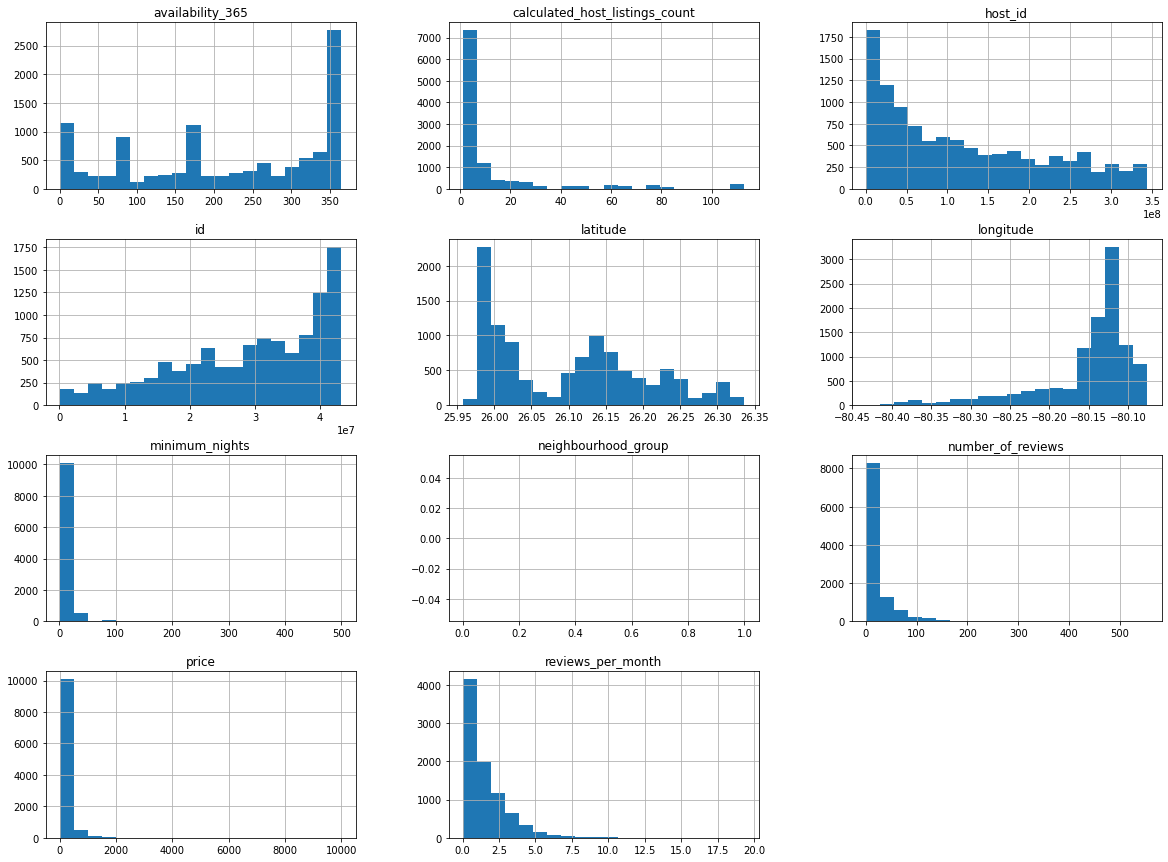

In [68]:
# plotar o histograma das variáveis numéricas
df.hist(bins=20, figsize=(20,15));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [69]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,10801.000000,10801.000000,10801.000000,8624.000000,10801.000000,10801.000000
mean,215.112027,6.586520,22.219054,1.537178,11.832701,216.432553
std,422.991643,20.814363,41.577584,1.616417,21.892538,128.207036
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,75.000000,1.000000,1.000000,0.410000,1.000000,90.000000
50%,126.000000,2.000000,7.000000,1.020000,3.000000,233.000000
75%,225.000000,4.000000,25.000000,2.170000,9.000000,348.000000
max,10000.000000,500.000000,554.000000,19.330000,113.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 225, porém seu valor máximo é 10000.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

#### Boxplot para minimum_nights


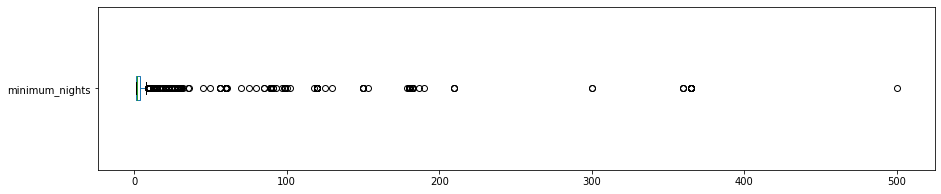

minimum_nights: valores acima de 30:
241 entradas
2.23%


In [90]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.2f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

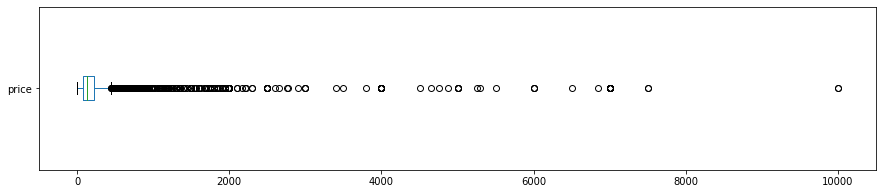


price: valores acima de 2000:
62 entradas
0.57%


In [91]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 2000 para price
print("\nprice: valores acima de 2000:")
print("{} entradas".format(len(df[df.price > 2000])))
print("{:.2f}%".format((len(df[df.price > 2000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

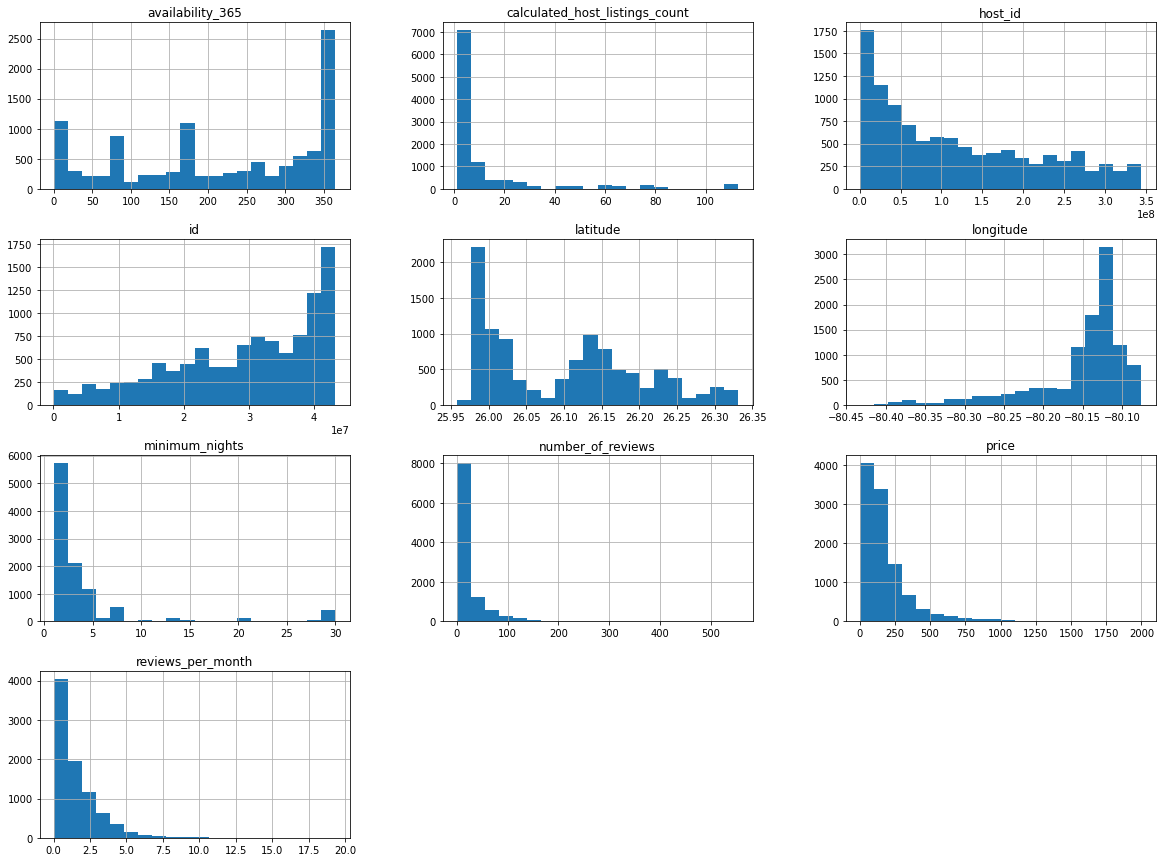

In [97]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 2000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=20, figsize=(20,15));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre dois parâmetros. Neste contexto, vamos buscar a relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, deve-se:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [100]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.052937,-0.132693,-0.149316,0.226147,0.096575
minimum_nights,0.052937,1.000000,-0.099941,-0.163063,-0.049459,0.050541
number_of_reviews,-0.132693,-0.099941,1.000000,0.661805,-0.110199,0.010305
reviews_per_month,-0.149316,-0.163063,0.661805,1.000000,-0.100546,-0.064534
calculated_host_listings_count,0.226147,-0.049459,-0.110199,-0.100546,1.000000,0.061179
availability_365,0.096575,0.050541,0.010305,-0.064534,0.061179,1.000000


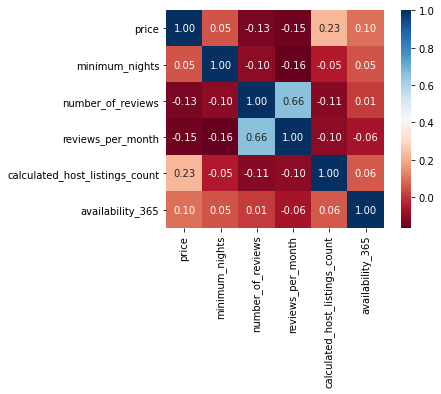

In [102]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [142]:
#Lista das cidades que mais aparecem
df_clean.neighbourhood.value_counts()

Hollywood                   2790
Fort Lauderdale             2289
Hallandale Beach            1023
Pompano Beach                930
Deerfield Beach              424
Dania Beach                  311
Wilton Manors                306
Lauderdale By The Sea        281
Miramar                      264
Oakland Park                 260
Pembroke Pines               232
Plantation                   192
Sunrise                      165
Davie                        139
Coral Springs                123
Weston                       108
West Park                    100
Lauderhill                    78
Tamarac                       71
Margate                       61
Coconut Creek                 59
Cooper City                   44
North Lauderdale              43
Lighthouse Point              36
Unincorporated                35
Lauderdale Lakes              35
Hillsboro Beach               26
Pembroke Park                 22
Parkland                      21
Southwest Ranches             18
County Reg

In [143]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    7901
Private room       2269
Shared room         202
Hotel room          131
Name: room_type, dtype: int64

In [144]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.752261
Private room       0.216034
Shared room        0.019233
Hotel room         0.012473
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara da Flórida?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.

In [145]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Southwest Ranches           428.777778
Lighthouse Point            395.083333
Hallandale Beach            251.600196
Hillsboro Beach             223.384615
Lauderdale By The Sea       218.864769
Fort Lauderdale             217.402796
County Regional Facility    201.666667
Hollywood                   197.432258
Pompano Beach               181.570968
Unincorporated              179.742857
Name: price, dtype: float64

Acima, vemos que bairros como Southwest Ranches, Lighthouse Point, Hallandale Beach e Hillsboro Beach estão com média de preço superior a de lugares como Hollywood, por exemplo.

Uma pessoa que não conhecesse a Flórida poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas existem em Southwest Ranches.

In [152]:
# ver quantidade de imóveis no Southwest Ranches
print(df_clean[df_clean.neighbourhood == "Southwest Ranches"].shape)

# ver as 18 entradas do Southwest Ranches
df_clean[df_clean.neighbourhood == "Southwest Ranches"]


(18, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,105411,House in the Ranches,532930,Sonia,Southwest Ranches,26.04678,-80.36809,Entire home/apt,235,4,5,2018-03-28,0.05,1,364
206,2585581,THIS IS YOUR SANCTUARY/ HEATED POOL,4087252,Arian,Southwest Ranches,26.04032,-80.39550,Entire home/apt,300,2,91,2020-04-07,1.24,1,338
682,8106624,Country State Colonial House,33870641,Willie,Southwest Ranches,26.04902,-80.33795,Entire home/apt,200,3,54,2020-04-18,0.98,5,153
1031,11292419,Bounty Of Zen&Nature Ranch {Private Sanctuary},1308739,Amy Lee,Southwest Ranches,26.03618,-80.32638,Entire home/apt,135,7,115,2020-04-17,2.84,2,354
1483,14914256,A Luxury Barn with Steam & jacuzzi,33870641,Willie,Southwest Ranches,26.04759,-80.33759,Entire home/apt,95,1,104,2020-02-09,2.42,5,299
2285,18995354,Luxurious Rooms at Casa Mansion,33870641,Willie,Southwest Ranches,26.04827,-80.33973,Private room,150,1,8,2020-02-23,0.31,5,173
2295,19034791,Peaceful Cozy Farmhome PRIVATE SUITE ENTRY & BATH,1308739,Amy Lee,Southwest Ranches,26.03618,-80.32638,Entire home/apt,80,30,88,2020-03-20,2.54,2,365
3359,23392875,THE RANCH.,137129723,Gail,Southwest Ranches,26.04715,-80.40445,Entire home/apt,89,5,4,2020-02-29,0.24,2,364
4667,29417865,Casa Mansion,33870641,Willie,Southwest Ranches,26.04711,-80.33853,Entire home/apt,600,7,0,NaN,NaN,5,173
4905,30040180,"Private Guest House (Fort Lauderdale, Weston)",225770416,Farin,Southwest Ranches,26.05578,-80.41197,Entire home/apt,109,2,59,2020-03-26,3.45,1,318


In [153]:
# ver quantidade de imóveis em Lighthouse Point
print(df_clean[df_clean.neighbourhood == "Lighthouse Point"].shape)

# ver as 36 entradas do Lighthouse Point
df_clean[df_clean.neighbourhood == "Lighthouse Point"]


(36, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
765,9218347,Secluded Cozy Home - 3 miles from the beach,3948681,Chris & Carol,Lighthouse Point,26.29523,-80.09370,Entire home/apt,149,2,10,2020-03-27,4.17,1,165
956,10584201,Bella Vacanza near the Inlet,9743916,Michelle,Lighthouse Point,26.27691,-80.08678,Entire home/apt,400,4,8,2019-06-05,0.16,4,314
1142,12093705,#8 - 4/B Grand Deluxe Luxurious Vacation Home,64319511,Wayne,Lighthouse Point,26.29215,-80.08796,Entire home/apt,250,7,12,2018-11-03,0.25,7,0
1227,12954350,S.Florida Waterfront Executive Home,68742590,Ernie,Lighthouse Point,26.27712,-80.08396,Entire home/apt,499,2,17,2019-03-22,0.48,1,363
1263,13215778,Our Floridian paradise Amazing waterfront villa,66857555,Veronique,Lighthouse Point,26.28997,-80.09376,Entire home/apt,600,3,16,2020-03-20,0.39,1,342
1481,14881441,Waterfront Estate Paradise- Lighthouse Point,22580003,Collette,Lighthouse Point,26.29066,-80.09283,Entire home/apt,600,4,21,2020-03-07,0.48,1,204
1913,16943438,Only 30-day Rentals are Permitted! Book Now.,112867074,Runar,Lighthouse Point,26.28116,-80.08424,Entire home/apt,271,3,13,2020-01-30,0.40,28,235
2345,19265829,No Less Than 30-day Rentals are Permitted!,112867074,Runar,Lighthouse Point,26.29649,-80.08276,Entire home/apt,489,3,7,2019-10-13,0.22,28,217
2400,19572975,Lighthouse Point Vacation Home,137553984,Eddie,Lighthouse Point,26.29684,-80.08822,Entire home/apt,200,3,4,2018-07-26,0.12,1,0
2412,19655942,Florida Beach House Paradise w/Pool!,52319393,Christina,Lighthouse Point,26.29603,-80.08717,Entire home/apt,175,3,17,2020-03-27,0.57,1,350


In [154]:
# ver quantidade de imóveis em Hallandale Beach
print(df_clean[df_clean.neighbourhood == "Hallandale Beach"].shape)

# ver as 1023 entradas do Hallandale Beach
df_clean[df_clean.neighbourhood == "Hallandale Beach"]


(1023, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,69824,2 bd/2ba Oceanfront Condo,351303,Tracy,Hallandale Beach,25.97840,-80.12028,Entire home/apt,100,30,7,2020-03-01,0.24,1,0
49,680331,"Oceanfront Condo in Hollywood, FL",3463815,Nelson,Hallandale Beach,25.98637,-80.11867,Entire home/apt,159,1,8,2017-03-20,0.10,2,365
61,844392,OCEANFRONT ON THE BEACH 4 FLOOR,2001930,Dmitri,Hallandale Beach,25.98623,-80.11940,Entire home/apt,119,5,7,2018-03-17,0.08,43,180
69,998144,OCEANFRONT MODERN 2/2 BEDROOM ON THE BEACH 2 FL,2001930,Dmitri,Hallandale Beach,25.98643,-80.11813,Entire home/apt,199,5,3,2018-03-03,0.04,43,174
101,1206443,Luxury High-Rise Condo on the Beach,6586687,Bonnie,Hallandale Beach,25.97843,-80.12082,Entire home/apt,200,30,0,NaN,NaN,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10768,43235306,Have fun in Hallandale! Kitchen and Free Parking,121702278,Sebastian,Hallandale Beach,25.98991,-80.14242,Entire home/apt,45,3,0,NaN,NaN,6,177
10770,43236186,Hallandale Beach - Free Parking-Kitchen,121702278,Sebastian,Hallandale Beach,25.98846,-80.14098,Entire home/apt,50,3,0,NaN,NaN,6,177
10790,43265695,Hyde Beach Resort 2803,245822703,Ron,Hallandale Beach,25.98573,-80.11812,Entire home/apt,115,30,0,NaN,NaN,29,362
10791,43265784,Hyde Beach Resort 3403,245822703,Ron,Hallandale Beach,25.98707,-80.11767,Entire home/apt,115,30,0,NaN,NaN,29,267


In [156]:
# ver quantidade de imóveis em Hillsboro Beach
print(df_clean[df_clean.neighbourhood == "Hillsboro Beach"].shape)

# ver as 26 entradas do Hillsboro Beach
df_clean[df_clean.neighbourhood == "Hillsboro Beach"]


(26, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
196,2452611,"Ocean or IntraCoastal, why not BOTH? - Villa W",12540540,Tom,Hillsboro Beach,26.30278,-80.07947,Entire home/apt,129,4,17,2020-01-01,0.46,5,266
1219,12928763,Get out of the cold at the beach!,70961435,Lori,Hillsboro Beach,26.29368,-80.07874,Entire home/apt,130,30,0,NaN,NaN,1,300
1689,15917754,Hillsboro Beach Condo,103274788,Brad And Caroline,Hillsboro Beach,26.29451,-80.07822,Entire home/apt,125,14,10,2020-03-19,0.27,1,292
1916,16945484,"Steps From Beach, Reno'd Ocean Side 2BR Villa",23429892,Dan,Hillsboro Beach,26.30421,-80.07794,Entire home/apt,176,5,36,2020-02-01,1.11,1,266
2351,19309045,"Ocean or IntraCoastal, why not BOTH? - Villa V",12540540,Tom,Hillsboro Beach,26.30362,-80.07834,Entire home/apt,223,4,2,2018-05-09,0.06,5,265
2564,20521967,At the Ocean - Apartment #112,146512744,Sunrise Ocean,Hillsboro Beach,26.30437,-80.07701,Entire home/apt,149,3,0,NaN,NaN,7,240
2591,20632713,At the Ocean - Apartment # 103,146512744,Sunrise Ocean,Hillsboro Beach,26.30437,-80.07701,Entire home/apt,149,3,0,NaN,NaN,7,296
2602,20652141,At the Ocean - Apartment with Large Deck - Apt...,146512744,Sunrise Ocean,Hillsboro Beach,26.30437,-80.07701,Entire home/apt,145,3,1,2018-01-28,0.04,7,210
2643,20895374,"Resort Villa - Ocean View, Private Beach - Vil...",12540540,Tom,Hillsboro Beach,26.30434,-80.07744,Entire home/apt,343,5,14,2019-12-21,0.47,5,257
2782,21445839,At the Ocean - Apartment #102,146512744,Sunrise Ocean,Hillsboro Beach,26.30437,-80.07701,Entire home/apt,149,3,0,NaN,NaN,7,241


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

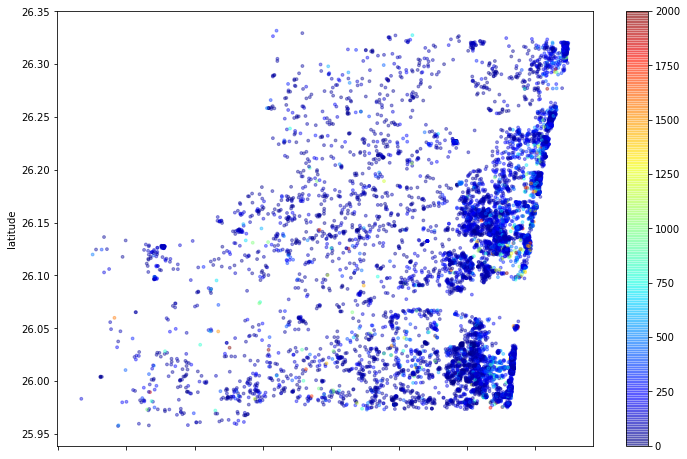

In [158]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.